# Esercizio 7

## Esercizio 7.2

Per trovare l'equilibrazione ho fatto progredire la simulazione per 1000 blocchi da 5000 passi partendo dalla configurazione a reticolo. L'equilibrio veniva raggiunto dopo 1,2 milioni di passi circa. Ho proceduto analogamente per lo stato liquido e gassoso. Per lo stato liquido ho avviato il programma dalla configurazione finale dello stato solido e il sistema ha raggiunto l'equilibrio dopo 2 milioni di passi. Lo stato gassoso ha raggiunto l'equilibrio dopo circa 3 milioni di passi, partendo dalla configurazione finale della simulazione dello stato liquido. Dai grafici dell'autocorrelazione ho riscontrato che questa andava a zero dopo 250 passi nel peggiore dei casi (stato liquido).

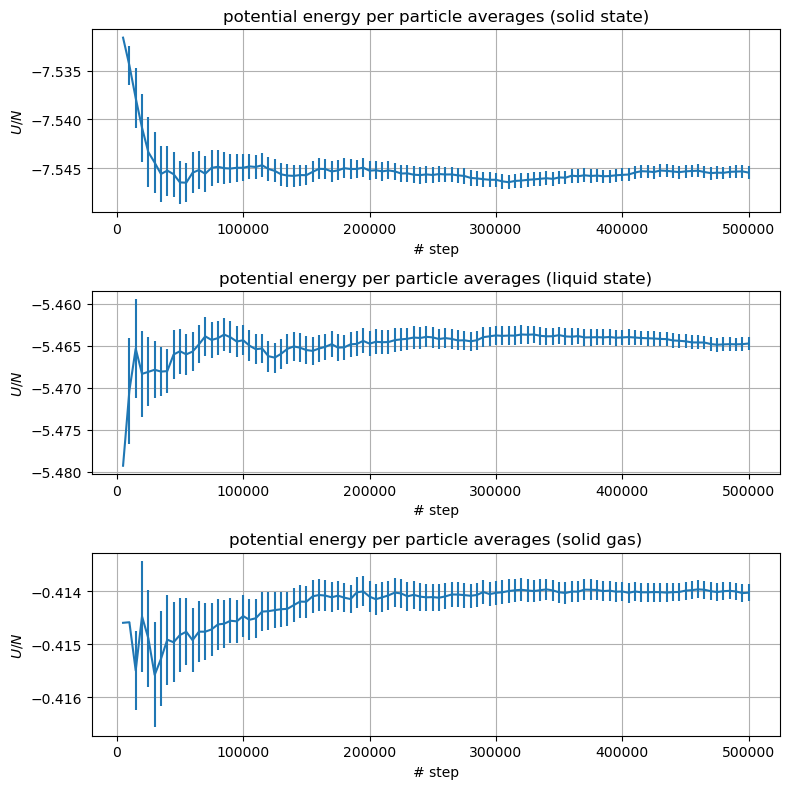

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

ave_epot_solid_metro = np.loadtxt("./ave_epot_solid_metro.dat")
ave_epot_liquid_metro = np.loadtxt("./ave_epot_liquid_metro.dat")
ave_epot_gas_metro = np.loadtxt("./ave_epot_gas_metro.dat")

fig1, axs = plt.subplots(3, 1, tight_layout = True, figsize=(8,8))

axs[0].errorbar(ave_epot_solid_metro[:,0]*5000, ave_epot_solid_metro[:,2], yerr=ave_epot_solid_metro[:,3])
axs[0].set_title("potential energy per particle averages (solid state)")

axs[1].errorbar(ave_epot_liquid_metro[:,0]*5000, ave_epot_liquid_metro[:,2], yerr=ave_epot_liquid_metro[:,3])
axs[1].set_title("potential energy per particle averages (liquid state)")

axs[2].errorbar(ave_epot_gas_metro[:,0]*5000, ave_epot_gas_metro[:,2], yerr=ave_epot_gas_metro[:,3])
axs[2].set_title("potential energy per particle averages (solid gas)")

for i in range(3):
    axs[i].set_xlabel('# step')
    axs[i].set_ylabel(r'$U/N$')    
    axs[i].grid(True)
    
plt.show()

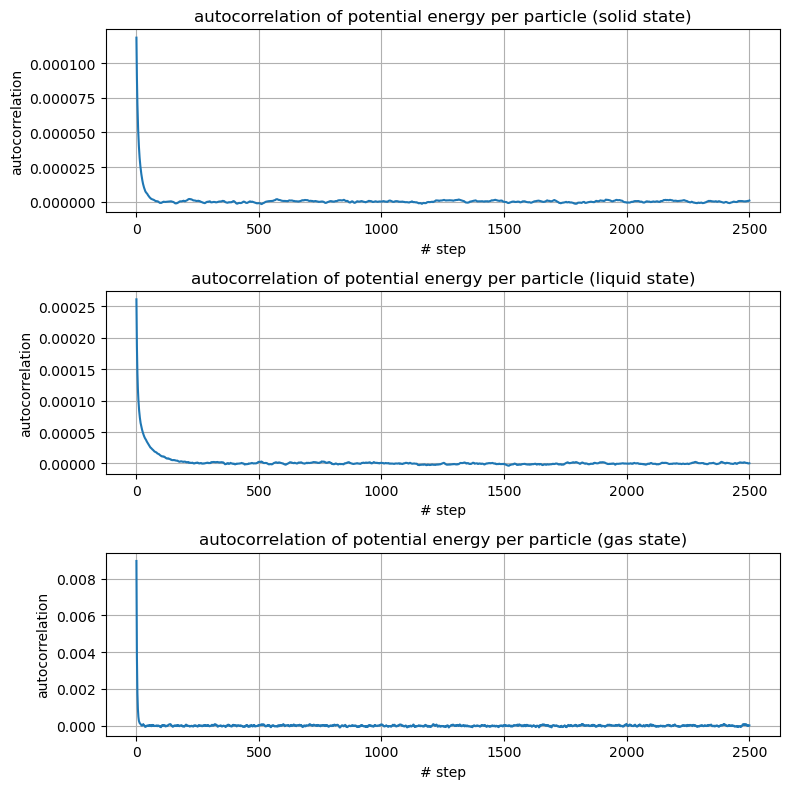

In [7]:
tmax = 500000
tstep = np.arange(tmax)

autocor_epot = np.zeros( (3, tmax - int(tmax/100) - 1, 2) )

autocor_epot[0] = np.loadtxt("./epot_solid_metro_autocorrelation.txt")
autocor_epot[1] = np.loadtxt("./epot_liquid_metro_autocorrelation.txt")
autocor_epot[2] = np.loadtxt("./epot_gas_metro_autocorrelation.txt")

fig1, axs = plt.subplots(3, 1, tight_layout = True, figsize=(8,8))

axs[0].plot(autocor_epot[0,:2500,0], autocor_epot[0,:2500,1])
axs[0].set_title("autocorrelation of potential energy per particle (solid state)")

axs[1].plot(autocor_epot[1,:2500,0], autocor_epot[1,:2500,1])
axs[1].set_title("autocorrelation of potential energy per particle (liquid state)")

axs[2].plot(autocor_epot[2,:2500,0], autocor_epot[2,:2500,1])
axs[2].set_title("autocorrelation of potential energy per particle (gas state)")

for i in range(3):
    axs[i].set_xlabel('# step')
    axs[i].set_ylabel('autocorrelation')    
    axs[i].grid(True)
    
plt.show()

Per calcolare le incertezze al variare del numero di blocchi ho usato come lunghezze dei blocchi i multipli di 10 da 10  a 5000. Dai grafici si vede che la deviazione standard delle medie dei blocchi di lunghezza maggiore di 2000 passi rimane costante, questo significa che le medie dei blocchi di lunghezza maggiore di 2000 passi possono considerarsi avere la stessa distribuzione e perciò di aver ottenuto dalle medie dei blocchi delle misure indipendenti della stessa osservabile.

In [8]:
epot_t = np.zeros( (3, tmax) )
pres_t = np.zeros( (3, tmax) )

epot_t[0] = np.loadtxt("./epot_solid_metro.dat")
pres_t[0] = np.loadtxt("./pres_solid_metro.dat")

epot_t[1] = np.loadtxt("./epot_liquid_metro.dat")
pres_t[1] = np.loadtxt("./pres_liquid_metro.dat")

epot_t[2] = np.loadtxt("./epot_gas_metro.dat")
pres_t[2] = np.loadtxt("./pres_gas_metro.dat")

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


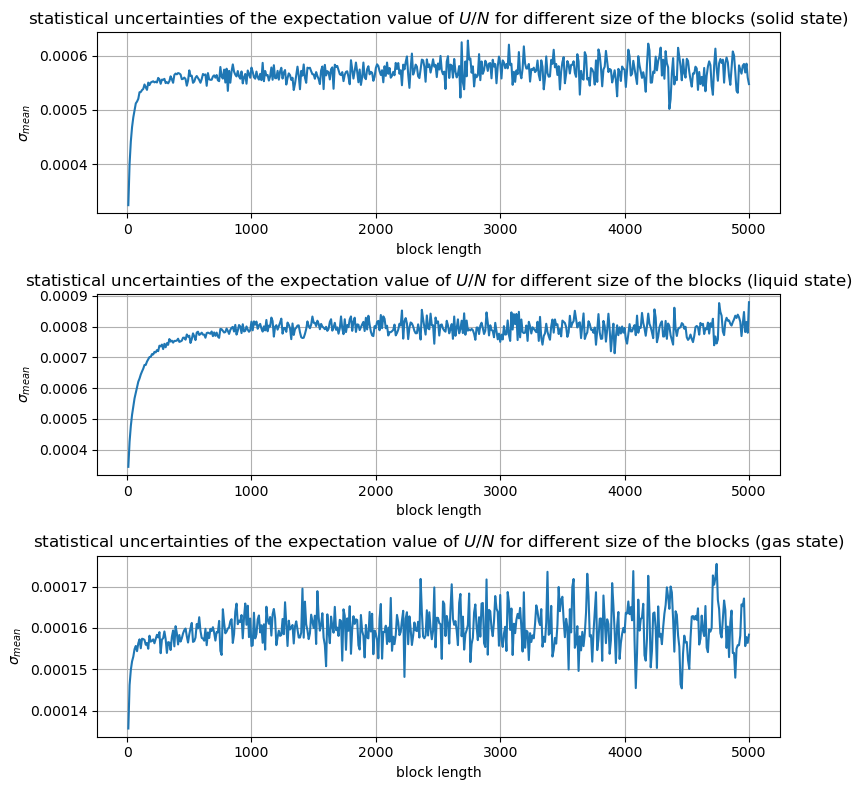

In [10]:
"""
n = 4*3
L = np.zeros(n)

for i in range(4): #i=0,1,2,3
    for j in range(3): #j=0,1,2
        L[i*3+j] = 10*(5**i)*(2**j) #così ho tutti i divisori di tmax da 10 a 5000

#for i in range(12):
    #print(L[i])
StDevMean_epot = np.zeros( (3, n) )

sum1 = 0
ave = 0
ave2 = 0

for state in range(3):
    
    for i in range( n ):
    
        nblk = tmax/L[i]
    
        ave = 0
        ave2 = 0
        
        for j in range( int(nblk) ):
        
            sum1 = 0
        
            for k in range( int(L[i]) ):
                
                sum1 += epot_t[state, j*int(L[i]) + k]
            
            sum1 = sum1/L[i]
            ave += sum1
            ave2 += sum1**2
    
        ave = ave/nblk
        ave2 = ave2/nblk            
        StDevMean_epot[state, i] = math.sqrt( (ave2 - ave**2)/nblk )
        
fig1, axs = plt.subplots(3, 1, tight_layout = True, figsize=(8,8))

axs[0].plot(L[:], StDevMean_epot[0,:])
axs[0].set_title("statistical uncertainties of the expectation value of $U/N$ for different size of the blocks (solid state)")

axs[1].plot(L[:], StDevMean_epot[1,:])
axs[1].set_title("statistical uncertainties of the expectation value of $U/N$ for different size of the blocks (liquid state)")

axs[2].plot(L[:], StDevMean_epot[2,:])
axs[2].set_title("statistical uncertainties of the expectation value of $U/N$ for different size of the blocks (gas state)")

for i in range(3):
    axs[i].set_xlabel('block length')
    axs[i].set_ylabel(r'$\sigma_{mean}$')    
    axs[i].grid(True)
    
plt.show()
"""
n = 500
L = np.zeros(n)

for i in range(500): #i=0,1,2,3
    L[i] = 10 + i*10

#for i in range(12):
    #print(L[i])
StDevMean_epot = np.zeros( (3, n) )

sum1 = 0
ave = 0
ave2 = 0

for state in range(3):
    
    for i in range( n ):
        if i%10 == 0:
            print(i)
    
        nblk = int(tmax/L[i])
    
        ave = 0
        ave2 = 0
        
        for j in range( int(nblk) ):
        
            sum1 = 0
        
            for k in range( int(L[i]) ):
                
                sum1 += epot_t[state, j*int(L[i]) + k]
            
            sum1 = sum1/L[i]
            ave += sum1
            ave2 += sum1**2
    
        ave = ave/nblk
        ave2 = ave2/nblk            
        StDevMean_epot[state, i] = math.sqrt( (ave2 - ave**2)/nblk )
        
fig1, axs = plt.subplots(3, 1, tight_layout = True, figsize=(8,8))

axs[0].plot(L[:], StDevMean_epot[0,:])
axs[0].set_title("statistical uncertainties of the expectation value of $U/N$ for different size of the blocks (solid state)")

axs[1].plot(L[:], StDevMean_epot[1,:])
axs[1].set_title("statistical uncertainties of the expectation value of $U/N$ for different size of the blocks (liquid state)")

axs[2].plot(L[:], StDevMean_epot[2,:])
axs[2].set_title("statistical uncertainties of the expectation value of $U/N$ for different size of the blocks (gas state)")

for i in range(3):
    axs[i].set_xlabel('block length')
    axs[i].set_ylabel(r'$\sigma_{mean}$')    
    axs[i].grid(True)
    
plt.show()

## Esercizio 7.3

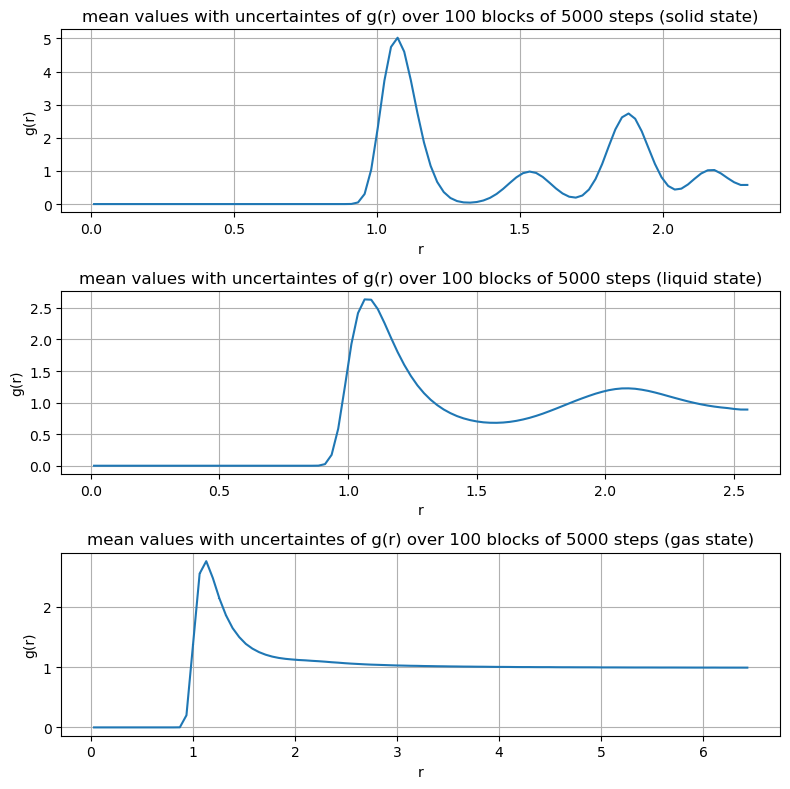

In [11]:
g_r_solid_metro = np.loadtxt("./g_r_final_ave_solid_metro.dat")
g_r_liquid_metro = np.loadtxt("./g_r_final_ave_liquid_metro.dat")
g_r_gas_metro = np.loadtxt("./g_r_final_ave_gas_metro.dat")

fig1, axs = plt.subplots(3, 1, tight_layout = True, figsize=(8,8))

axs[0].errorbar(g_r_solid_metro[:,0], g_r_solid_metro[:,1], yerr = g_r_solid_metro[:,2])
axs[0].set_title("mean values with uncertaintes of g(r) over 100 blocks of 5000 steps (solid state)")

axs[1].errorbar(g_r_liquid_metro[:,0], g_r_liquid_metro[:,1], yerr = g_r_liquid_metro[:,2])
axs[1].set_title("mean values with uncertaintes of g(r) over 100 blocks of 5000 steps (liquid state)")

axs[2].errorbar(g_r_gas_metro[:,0], g_r_gas_metro[:,1], yerr = g_r_gas_metro[:,2])
axs[2].set_title("mean values with uncertaintes of g(r) over 100 blocks of 5000 steps (gas state)")

for i in range(3):
    axs[i].set_xlabel('r')
    axs[i].set_ylabel('g(r)')    
    axs[i].grid(True)
    
plt.show()

## Esercizio 7.4

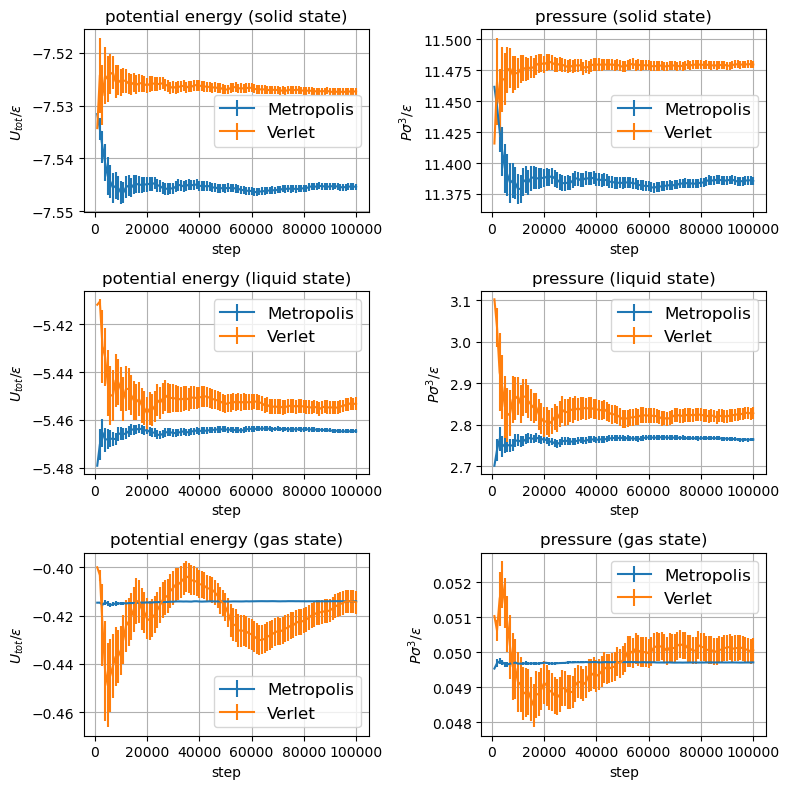

In [12]:

# metro (gli epot li ho già caricati nelle precedenti celle di questo notebook)
ave_pres_solid_metro = np.loadtxt("./ave_pres_solid_metro.dat")
ave_pres_liquid_metro = np.loadtxt("./ave_pres_liquid_metro.dat")
ave_pres_gas_metro = np.loadtxt("./ave_pres_gas_metro.dat")

ave_epot_solid_verlet = np.loadtxt("./ave_epot_solid_verlet.dat")
ave_pres_solid_verlet = np.loadtxt("./ave_pres_solid_verlet.dat")
ave_temp_solid_verlet = np.loadtxt("./ave_temp_solid_verlet.dat") 

ave_epot_liquid_verlet = np.loadtxt("./ave_epot_liquid_verlet.dat")
ave_pres_liquid_verlet = np.loadtxt("./ave_pres_liquid_verlet.dat")
ave_temp_liquid_verlet = np.loadtxt("./ave_temp_liquid_verlet.dat") 

ave_epot_gas_verlet = np.loadtxt("./ave_epot_gas_verlet.dat")
ave_pres_gas_verlet = np.loadtxt("./ave_pres_gas_verlet.dat")
ave_temp_gas_verlet = np.loadtxt("./ave_temp_gas_verlet.dat") 

    
"""
fig1, axs = plt.subplots(3, 1, tight_layout = True, figsize=(8,8))

axs[0].errorbar(ave_epot_gas_verlet[:,0]*1000, ave_epot_gas_verlet[:,2], yerr = ave_epot_gas_verlet[:,3])
axs[0].set_title("potential energy with verlet algorithm(gas state)")
axs[0].set_ylabel(r'$U_{tot}/\epsilon}$')

axs[1].errorbar(ave_pres_gas_verlet[:,0]*1000, ave_pres_gas_verlet[:,2], yerr = ave_pres_gas_verlet[:,3])
axs[1].set_title("pressure with verlet algorithm(gas state)")
axs[1].set_ylabel(r'$P\sigma^3/\epsilon}$')

axs[2].errorbar(ave_temp_gas_verlet[:,0]*1000, ave_temp_gas_verlet[:,2], yerr = ave_temp_gas_verlet[:,3])
axs[2].set_title("temperature with verlet algorithm(gas state)")
axs[2].set_ylabel(r'$TK_B/\epsilon}$')


for i in range(3):
    axs[i].set_xlabel('r')    
    axs[i].grid(True)
"""
fig1, axs = plt.subplots(3, 2, tight_layout = True, figsize=(8,8))

axs[0,0].errorbar(ave_epot_solid_metro[:,0]*1000, ave_epot_solid_metro[:,2], yerr = ave_epot_solid_metro[:,3], label='Metropolis')
axs[0,0].errorbar(ave_epot_solid_verlet[:,0]*1000, ave_epot_solid_verlet[:,2], yerr = ave_epot_solid_verlet[:,3], label='Verlet')
axs[0,0].set_title("potential energy (solid state)")
axs[0,0].set_ylabel(r'$U_{tot}/\epsilon}$')

axs[0,1].errorbar(ave_pres_solid_metro[:,0]*1000, ave_pres_solid_metro[:,2], yerr = ave_pres_solid_metro[:,3], label='Metropolis')
axs[0,1].errorbar(ave_pres_solid_verlet[:,0]*1000, ave_pres_solid_verlet[:,2], yerr = ave_pres_solid_verlet[:,3], label='Verlet')
axs[0,1].set_title("pressure (solid state)")
axs[0,1].set_ylabel(r'$P\sigma^3/\epsilon}$')

#liquid
axs[1,0].errorbar(ave_epot_liquid_metro[:,0]*1000, ave_epot_liquid_metro[:,2], yerr = ave_epot_liquid_metro[:,3], label='Metropolis')
axs[1,0].errorbar(ave_epot_liquid_verlet[:,0]*1000, ave_epot_liquid_verlet[:,2], yerr = ave_epot_liquid_verlet[:,3], label='Verlet')
axs[1,0].set_title("potential energy (liquid state)")
axs[1,0].set_ylabel(r'$U_{tot}/\epsilon}$')

axs[1,1].errorbar(ave_pres_liquid_metro[:,0]*1000, ave_pres_liquid_metro[:,2], yerr = ave_pres_liquid_metro[:,3], label='Metropolis')
axs[1,1].errorbar(ave_pres_liquid_verlet[:,0]*1000, ave_pres_liquid_verlet[:,2], yerr = ave_pres_liquid_verlet[:,3], label='Verlet')
axs[1,1].set_title("pressure (liquid state)")
axs[1,1].set_ylabel(r'$P\sigma^3/\epsilon}$')


#gas
axs[2,0].errorbar(ave_epot_gas_metro[:,0]*1000, ave_epot_gas_metro[:,2], yerr = ave_epot_gas_metro[:,3], label='Metropolis')
axs[2,0].errorbar(ave_epot_gas_verlet[:,0]*1000, ave_epot_gas_verlet[:,2], yerr = ave_epot_gas_verlet[:,3], label='Verlet')
axs[2,0].set_title("potential energy (gas state)")
axs[2,0].set_ylabel(r'$U_{tot}/\epsilon}$')

axs[2,1].errorbar(ave_pres_gas_metro[:,0]*1000, ave_pres_gas_metro[:,2], yerr = ave_pres_gas_metro[:,3], label='Metropolis')
axs[2,1].errorbar(ave_pres_gas_verlet[:,0]*1000, ave_pres_gas_verlet[:,2], yerr = ave_pres_gas_verlet[:,3], label='Verlet')
axs[2,1].set_title("pressure (gas state)")
axs[2,1].set_ylabel(r'$P\sigma^3/\epsilon}$')



for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel('step')   
        axs[i,j].legend(fontsize='large')
        axs[i,j].grid(True)

plt.show()

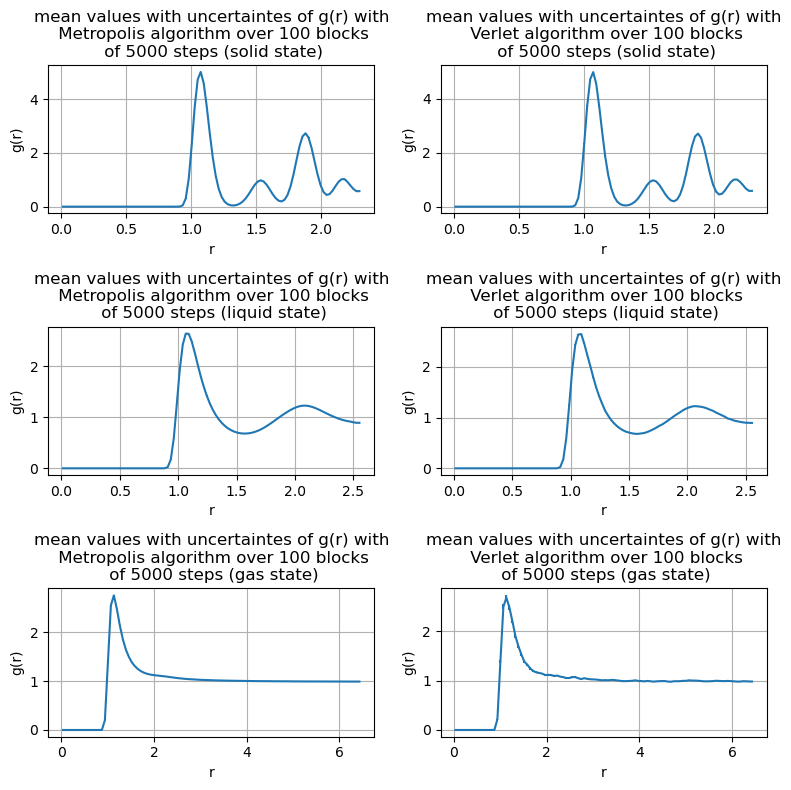

In [13]:
g_r_solid_verlet = np.loadtxt("./g_r_final_ave_solid_verlet.dat")
g_r_liquid_verlet = np.loadtxt("./g_r_final_ave_liquid_verlet.dat")
g_r_gas_verlet = np.loadtxt("./g_r_final_ave_gas_verlet.dat")

fig1, axs = plt.subplots(3, 2, tight_layout = True, figsize=(8,8))

axs[0,0].errorbar(g_r_solid_metro[:,0], g_r_solid_metro[:,1], yerr = g_r_solid_metro[:,2])
axs[0,1].errorbar(g_r_solid_verlet[:,0], g_r_solid_verlet[:,1], yerr = g_r_solid_verlet[:,2])
axs[0,0].set_title("mean values with uncertaintes of g(r) with\n Metropolis algorithm over 100 blocks\n of 5000 steps (solid state)")
axs[0,1].set_title("mean values with uncertaintes of g(r) with\n Verlet algorithm over 100 blocks\n of 5000 steps (solid state)")

axs[1,0].errorbar(g_r_liquid_metro[:,0], g_r_liquid_metro[:,1], yerr = g_r_liquid_metro[:,2])
axs[1,1].errorbar(g_r_liquid_verlet[:,0], g_r_liquid_verlet[:,1], yerr = g_r_liquid_verlet[:,2])
axs[1,0].set_title("mean values with uncertaintes of g(r) with\n Metropolis algorithm over 100 blocks\n of 5000 steps (liquid state)")
axs[1,1].set_title("mean values with uncertaintes of g(r) with\n Verlet algorithm over 100 blocks\n of 5000 steps (liquid state)")

axs[2,0].errorbar(g_r_gas_metro[:,0], g_r_gas_metro[:,1], yerr = g_r_gas_metro[:,2])
axs[2,1].errorbar(g_r_gas_verlet[:,0], g_r_gas_verlet[:,1], yerr = g_r_gas_verlet[:,2])
axs[2,0].set_title("mean values with uncertaintes of g(r) with\n Metropolis algorithm over 100 blocks\n of 5000 steps (gas state)")
axs[2,1].set_title("mean values with uncertaintes of g(r) with\n Verlet algorithm over 100 blocks\n of 5000 steps (gas state)")


for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel('r')  
        axs[i,j].set_ylabel('g(r)')   
        axs[i,j].grid(True)
        
plt.show()